<a href="https://colab.research.google.com/github/kapserge/AgorizeMaster/blob/master/testlik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving sample.json to sample.json


In [2]:
df = pd.read_json('sample.json', lines=True)
#print(df.to_string()) 
dff = pd.DataFrame(df)
dff

,uid,timestampMs,eventKind,country,device,siteId,advertiserId,pricePublisherUusd,priceAdvertiserUusd
0,e0b81eb5f6594aa2,2022-01-24 21:59:24.303,IMPRESSION,US,DESKTOP,480ee6bd10ed59df,8cb89e594a81f44f,194.0,243.0
1,396d0ea901cb620a,2022-01-24 21:59:25.133,VISIBLE_IMPRESSION,MX,MOBILE,9087936d83970b83,8cb89e594a81f44f,NaN,NaN
2,c09e8771b6dedeba,2022-01-24 21:59:25.150,IMPRESSION,US,MOBILE,9087936d83970b83,8cb89e594a81f44f,998.0,1248.0
3,64a498c6b069a348,2022-01-24 21:59:25.221,IMPRESSION,US,MOBILE,480ee6bd10ed59df,8cb89e594a81f44f,91.0,114.0
4,c9ccc24529e386b0,2022-01-24 21:59:25.768,IMPRESSION,US,MOBILE,480ee6bd10ed59df,8cb89e594a81f44f,149.0,187.0
...,...,...,...,...,...,...,...,...,...
373,855fe05bbdba5f31,2022-01-24 21:59:59.444,IMPRESSION,US,MOBILE,480ee6bd10ed59df,8cb89e594a81f44f,216.0,270.0
374,52699e217ff351db,2022-01-24 21:59:59.005,IMPRESSION,US,MOBILE,3c94659ca03af09d,8cb89e594a81f44f,752.0,941.0
375,1c7e29b4661da4af,2022-01-24 21:59:58.950,VISIBLE_IMPRESSION,US,TABLET,b4173f7a4cfabe14,8cb89e594a81f44f,NaN,NaN
376,2cb6512e91a6035c,2022-01-24 21:59:59.167,VISIBLE_IMPRESSION,US,DESKTOP,f436e4837741993a,8cb89e594a81f44f,NaN,NaN


In [10]:
multi= df.loc[(df['device'] == 'TABLET') & (df['pricePublisherUusd'] <= 700)]
multi

,uid,timestampMs,eventKind,country,device,siteId,advertiserId,pricePublisherUusd,priceAdvertiserUusd
75,071f616621a783df,2022-01-24 21:59:32.044,IMPRESSION,US,TABLET,0819a63e4e5a67a3,8cb89e594a81f44f,203.0,291.0
114,777c37d9d3dcdc4c,2022-01-24 21:59:37.554,IMPRESSION,US,TABLET,3c94659ca03af09d,8cb89e594a81f44f,87.0,109.0
187,f8d2e062442f63fb,2022-01-24 21:59:40.842,IMPRESSION,US,TABLET,3c94659ca03af09d,8cb89e594a81f44f,140.0,176.0
198,32b07f0a802e5216,2022-01-24 21:59:46.043,IMPRESSION,CA,TABLET,aff9abc8a61c1633,8cb89e594a81f44f,259.0,288.0
321,d9e1c77955b18838,2022-01-24 21:59:55.236,IMPRESSION,US,TABLET,f2fd69036def973d,8cb89e594a81f44f,209.0,262.0
356,a6bc56d2e80438fc,2022-01-24 21:59:59.771,IMPRESSION,CA,TABLET,98cad5443b208810,8cb89e594a81f44f,560.0,700.0
362,eedbfd442cbe9898,2022-01-24 21:59:57.685,IMPRESSION,US,TABLET,5993b81079610258,8cb89e594a81f44f,276.0,345.0


In [26]:
count_imp= df.groupby('device').size()
count_imp

device
DESKTOP    116
MOBILE     250
TABLET      12
dtype: int64

In [3]:
gp = df.groupby('device')
for device, group in gp:
    print(device)
    print("**********************")
    print(group)
    print()

DESKTOP
**********************
                  uid  ... priceAdvertiserUusd
0    e0b81eb5f6594aa2  ...               243.0
6    37634004b622054d  ...               111.0
10   4283eceaf67ae0ae  ...                18.0
13   dd6a9423eaea5b54  ...                 NaN
15   429762e5b7d69d02  ...                 NaN
..                ...  ...                 ...
365  93c05c5280b7f6a9  ...               134.0
366  ac2cdc18f8dfd69b  ...               135.0
372  b8b24ce2a0f1d23f  ...               139.0
376  2cb6512e91a6035c  ...                 NaN
377  da3ff852aed9f8b4  ...                 NaN

[116 rows x 9 columns]

MOBILE
**********************
                  uid  ... priceAdvertiserUusd
1    396d0ea901cb620a  ...                 NaN
2    c09e8771b6dedeba  ...              1248.0
3    64a498c6b069a348  ...               114.0
4    c9ccc24529e386b0  ...               187.0
5    48ed754cc18d64ba  ...               375.0
..                ...  ...                 ...
369  89a56fa23c84ba49

In [24]:
select_mois = df[df["country"] == "MX"]
select_device = select_mois[select_mois["device"] == "DESKTOP"]
select_device

,uid,timestampMs,eventKind,country,device,siteId,advertiserId,pricePublisherUusd,priceAdvertiserUusd
320,29b9028daedd6516,2022-01-24 21:59:55.229,IMPRESSION,MX,DESKTOP,79b7b2441819bfba,8cb89e594a81f44f,117.0,130.0


In [28]:
group_df = df.groupby('device').size()
group_df

device
DESKTOP    116
MOBILE     250
TABLET      12
dtype: int64

In [35]:
maxValues = df[df['priceAdvertiserUusd'] == df['priceAdvertiserUusd'].max()]
maxValues

,uid,timestampMs,eventKind,country,device,siteId,advertiserId,pricePublisherUusd,priceAdvertiserUusd
202,b124ed9e3ce8eb5e,2022-01-24 21:59:42.950,IMPRESSION,US,MOBILE,9087936d83970b83,8cb89e594a81f44f,5295.0,8825.0


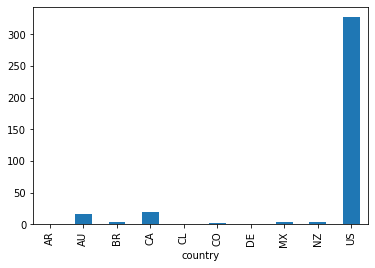

In [27]:
def max_entier(x):
    return int(max(x))

import matplotlib.pyplot as plt
import numpy as np


groups = df.groupby(['country']).size()
groups.plot.bar()

In [12]:
nbr = df.groupby('device').count().sort_values(by='pricePublisherUusd', ascending=False)

nbr.head()

,uid,timestampMs,eventKind,country,siteId,advertiserId,pricePublisherUusd,priceAdvertiserUusd
device,,,,,,,,
MOBILE,250,250,250,250,250,250,174,172
DESKTOP,116,116,116,116,116,116,82,67
TABLET,12,12,12,12,12,12,7,7


In [10]:
sup_inf = df[df["pricePublisherUusd"] < 702.0]

sup_inf

,uid,timestampMs,eventKind,country,device,siteId,advertiserId,pricePublisherUusd,priceAdvertiserUusd
0,e0b81eb5f6594aa2,2022-01-24 21:59:24.303,IMPRESSION,US,DESKTOP,480ee6bd10ed59df,8cb89e594a81f44f,194.0,243.0
3,64a498c6b069a348,2022-01-24 21:59:25.221,IMPRESSION,US,MOBILE,480ee6bd10ed59df,8cb89e594a81f44f,91.0,114.0
4,c9ccc24529e386b0,2022-01-24 21:59:25.768,IMPRESSION,US,MOBILE,480ee6bd10ed59df,8cb89e594a81f44f,149.0,187.0
5,48ed754cc18d64ba,2022-01-24 21:59:26.840,IMPRESSION,US,MOBILE,480ee6bd10ed59df,8cb89e594a81f44f,300.0,375.0
6,37634004b622054d,2022-01-24 21:59:27.959,IMPRESSION,US,DESKTOP,480ee6bd10ed59df,8cb89e594a81f44f,88.0,111.0
...,...,...,...,...,...,...,...,...,...
369,89a56fa23c84ba49,2022-01-24 21:59:59.752,IMPRESSION,US,MOBILE,3c94659ca03af09d,8cb89e594a81f44f,449.0,562.0
370,1053ecc41f44331c,2022-01-24 21:59:59.891,IMPRESSION,US,MOBILE,480ee6bd10ed59df,8cb89e594a81f44f,300.0,375.0
371,79f4d7ad229420d2,2022-01-24 21:59:59.137,IMPRESSION,US,MOBILE,480ee6bd10ed59df,8cb89e594a81f44f,284.0,356.0
372,b8b24ce2a0f1d23f,2022-01-24 21:59:59.236,IMPRESSION,US,DESKTOP,f1207091ebe7812f,8cb89e594a81f44f,118.0,139.0


In [12]:
df.shape

(378, 9)

In [13]:
df.isnull().any()

uid                    False
timestampMs            False
eventKind              False
country                False
device                 False
siteId                 False
advertiserId           False
pricePublisherUusd      True
priceAdvertiserUusd     True
dtype: bool

In [14]:
df.columns[df.isnull().any()]

Index(['pricePublisherUusd', 'priceAdvertiserUusd'], dtype='object')

In [15]:
df.isnull().sum()

uid                      0
timestampMs              0
eventKind                0
country                  0
device                   0
siteId                   0
advertiserId             0
pricePublisherUusd     115
priceAdvertiserUusd    132
dtype: int64

In [16]:
df.index[df.isnull().any(axis=1)]

Int64Index([  1,   7,  12,  13,  15,  17,  18,  19,  24,  26,
            ...
            338, 343, 344, 354, 357, 364, 368, 375, 376, 377],
           dtype='int64', length=132)

In [17]:
df.iloc[1,:].isnull().sum()

2